# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Crear una conexión a la base de datos SQLite en memoria
engine = create_engine('sqlite:///:memory:')

# Leer el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

# Guardar el DataFrame en la tabla "data" en la base de datos
df.to_sql('data', engine, index=False)

# Ejecutar una consulta SQL para obtener los datos de la tabla
query = 'SELECT * FROM data LIMIT 10'
result = pd.read_sql_query(query, engine)

# Imprimir los resultados
print(result)

     id                                              name  host_id   
0  2539                Clean & quiet apt home by the park     2787  \
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude   
0         John            Brooklyn          Kensington  40.64749  -73.97237  \
1     Jennifer           Manhattan             Midtown  40.75362  -73.9

In [2]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
dataframe.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Conclusiones:

- Hay 48895 registros en el DataFrame.
- Price tiene un valor mínimo de 0 y un valor máximo de 10000. La media es de aprox 152.72 y la desviación estándar es de aprox 240.15. Hay una amplia variabilidad en los precios.



# Paso 2: Exploración y limpieza de datos

In [3]:
# Obtener las dimensiones
dataframe.shape

(48895, 16)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Conclusiones:

-  Tiene un total de 48895 filas y 16 columnas
-  Hay varias columnas con valores no nulos: name, host_name, last_review, y reviews_per_month.
-  Nos proporciona una visión general de los tipos de datos y los valores no nulos en el DataFrame. También sabemos que columnas que podrían requerir limpieza de valores faltantes.




In [5]:
#Eliminar duplicados
dataframe.drop("availability_365", axis = 1).duplicated().sum()

print("no hay diplucados en las columnas.")

no hay diplucados en las columnas.


In [6]:
#Eliminar información irrelevante
dataframe.drop(["id", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
dataframe.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Paso 3: Análisis de variables univariante

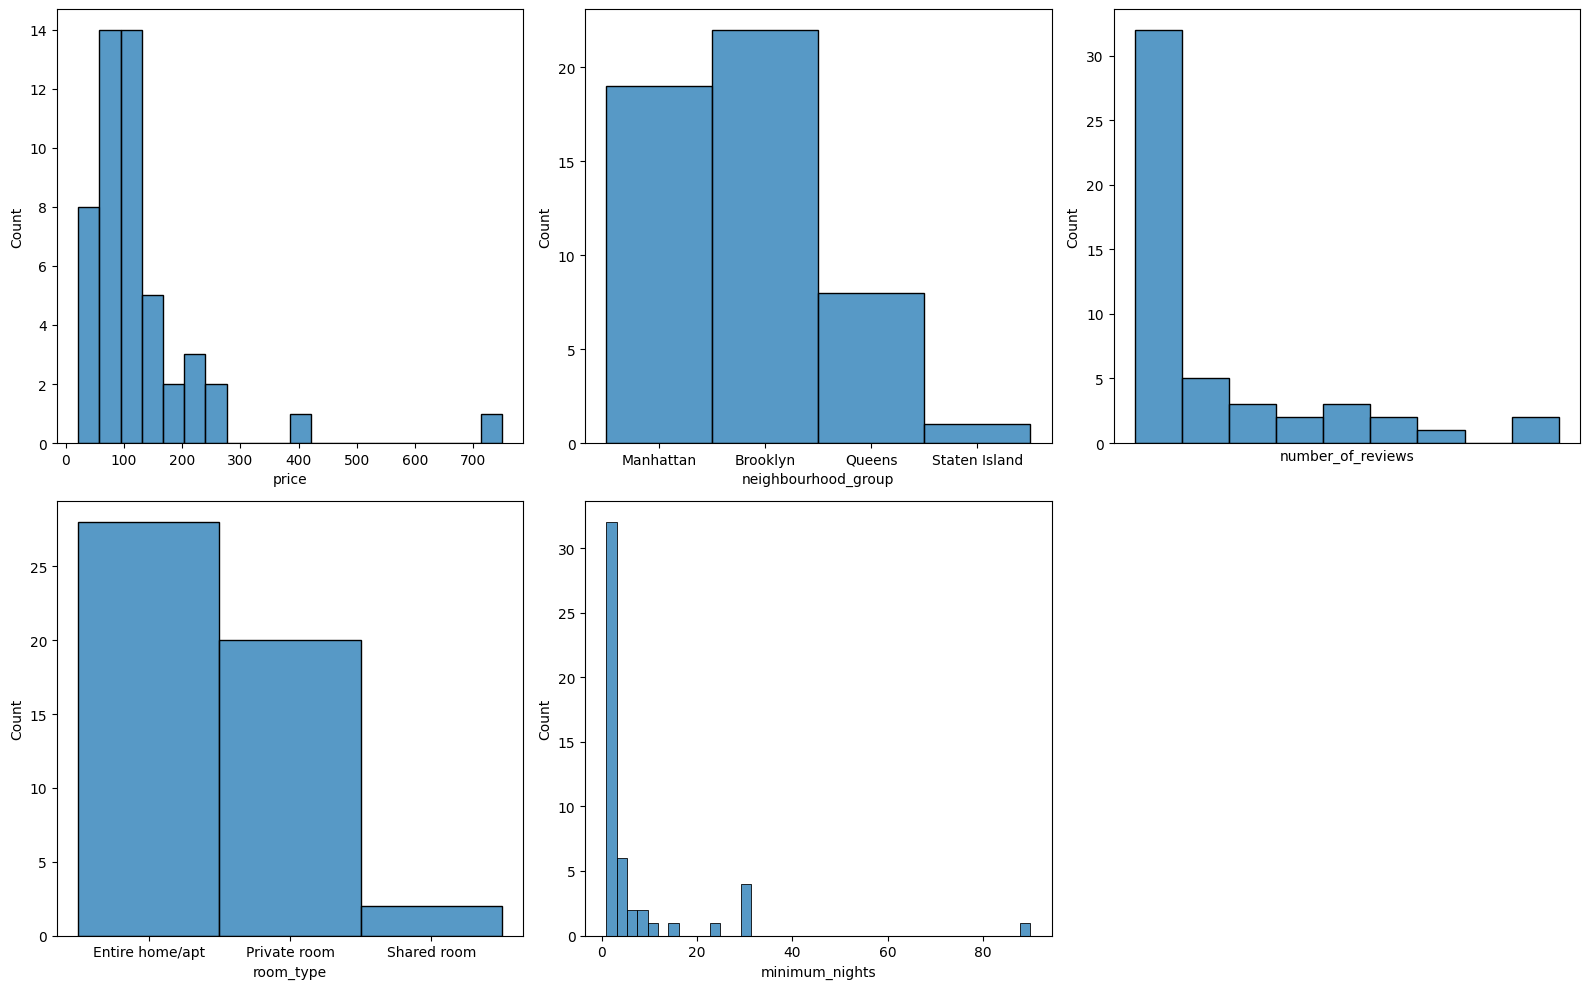

In [7]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Crear histogramas
sampled_data = dataframe.sample(50)
sns.histplot(ax=axes[0, 0], data=sampled_data, x='price')
sns.histplot(ax=axes[0, 1], data=sampled_data, x='neighbourhood_group')
sns.histplot(ax=axes[0, 2], data=sampled_data, x='number_of_reviews').set_xticks([])
sns.histplot(ax=axes[1, 0], data=sampled_data, x='room_type')
sns.histplot(ax=axes[1, 1], data=sampled_data, x='minimum_nights')
fig.delaxes(axes[1, 2])

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Conclusiones

- Histograma de 'price': Muestra la distribución de los precios de las propiedades. Vemos una distribución sesgada hacia la derecha, con la mayoría de los precios en el rango más bajo y algunos valores atípicos en el extremo derecho.
- Histograma de 'neighbourhood_group': Muesttra la distribución de los grupos de vecindarios. Cada barra en el gráfico correspondería a un grupo de vecindario y muestra la cantidad de propiedades en cada grupo. Nos una idea de la distribución geográfica de las propiedades en los diferentes grupos de vecindarios.
- Histograma de 'number_of_reviews': Muestra la distribución de la cantidad de opiniones para las propiedades y se muestra la frecuencia de las revisiones sin mostrar los valores exactos.
- Histograma de 'room_type': Muestra la distribución de los tipos de habitacionesy cada barra en el gráfico nos muestra la cantidad de propiedades en cada tipo de habitación.
- Histograma de 'minimum_nights': Muestra la distribución de la cantidad mínima de noches requeridas para reservar una propiedad. Nos una idea de las políticas de reserva de las propiedades y no la cantidad de dias que estarian disponibles para alquilar.


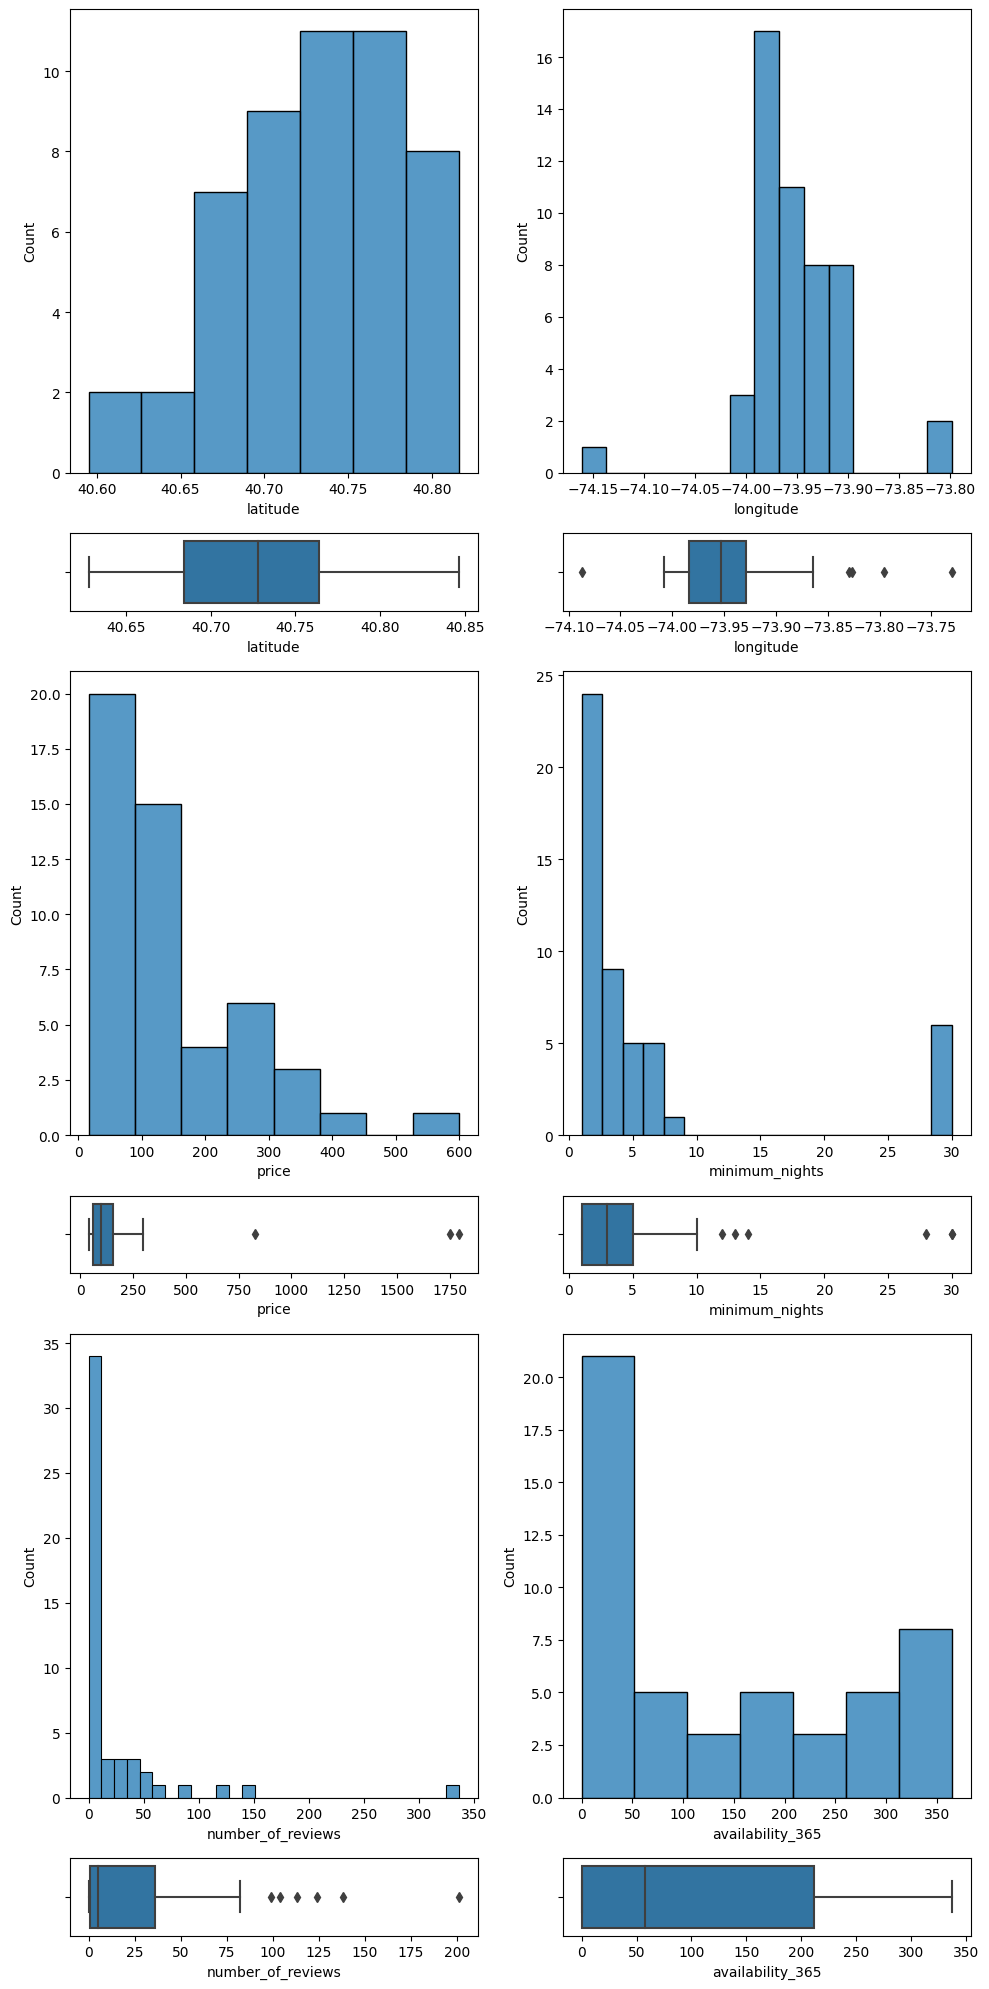

In [8]:
#Análisis sobre variables numéricas

import matplotlib.pyplot as plt 
import seaborn as sns

# Crear una figura de subplots con configuración de 6 filas y 2 columnas
fig, axis = plt.subplots(6, 2, figsize=(10, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe.sample(50), x="latitude")
sns.boxplot(ax=axis[1, 0], data=dataframe.sample(50), x="latitude")
sns.histplot(ax=axis[0, 1], data=dataframe.sample(50), x="longitude")
sns.boxplot(ax=axis[1, 1], data=dataframe.sample(50), x="longitude")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe.sample(50), x="price")
sns.boxplot(ax=axis[3, 0], data=dataframe.sample(50), x="price")
sns.histplot(ax=axis[2, 1], data=dataframe.sample(50), x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=dataframe.sample(50), x="minimum_nights")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe.sample(50), x="number_of_reviews")
sns.boxplot(ax=axis[5, 0], data=dataframe.sample(50), x="number_of_reviews")
sns.histplot(ax=axis[4, 1], data=dataframe.sample(50), x="availability_365")
sns.boxplot(ax=axis[5, 1], data=dataframe.sample(50), x="availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones

- Histograma y boxplot de 'latitude': El histograma muestra la distribución de las latitudes de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. La media es de aproximadamente 40.728949, lo que indica que la mayoría de las propiedades se encuentran en el hemisferio norte. La desviación estándar es de aproximadamente 0.054530, lo que indica cierta variabilidad en las ubicaciones geográficas.
- Histograma y boxplot de 'longitude': El histograma muestra la distribución de las longitudes de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. La media es de aproximadamente -73.952170, lo que indica una ubicación general en el área de Nueva York. La desviación estándar es de aproximadamente 0.046157, lo que tambien indica cierta variabilidad en las ubicaciones geográficas.
- Histograma y boxplot de 'price': El histograma muestra la distribución de los precios de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. Hay una amplia variabilidad en los precios de las propiedades. El precio mínimo es de 0, mientras que el máximo es de 10,000. La media es de aproximadamente 152.72, lo que indica que hay una distribución sesgada hacia la derecha. La desviación estándar es de aproximadamente 240.15, lo que indica una gran dispersión de precios en el conjunto de datos.
- Histograma y boxplot de 'minimum_nights': El histograma mostraría la distribución de la cantidad mínima de noches requeridas para reservar una propiedad, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 7.03 y una desviación estándar de aproximadamente 20.51. Esto indica que, en promedio, se requieren alrededor de 7 noches como mínimo para reservar una propiedad. Tambien hay que tener en cuenta si estás interesado en alquileres a corto plazo o largo plazo, ya ue para uno son los  valores más bajos y para otro son los valores más altos.
- Histograma y boxplot de 'number_of_reviews': El histograma mostraría la distribución de la cantidad de revisiones para las propiedades, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 23.27 y una desviación estándar de aproximadamente 44.55. Las propiedades tienen alrededor de 23 revisiones de media. Tambien hay una gran variabilidad en la cantidad de revisiones, ya que la desviación estándar es relativamente alta. La cantidad de revisiones puede ser indicativa de la popularidad, la calidad o la satisfacción de los huéspedes con las propiedades.
- Histograma y boxplot de 'availability_365': El histograma mostraría la distribución de la disponibilidad de las propiedades a lo largo del año, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 112.78 y una desviación estándar de aproximadamente 131.62. Las propiedades están disponibles para reserva alrededor de 112 días al año de media. La disponibilidad de las propiedades puede influir en la demanda, los precios y la planificación de la reserva

### Paso 4: Análisis de variables multivariante

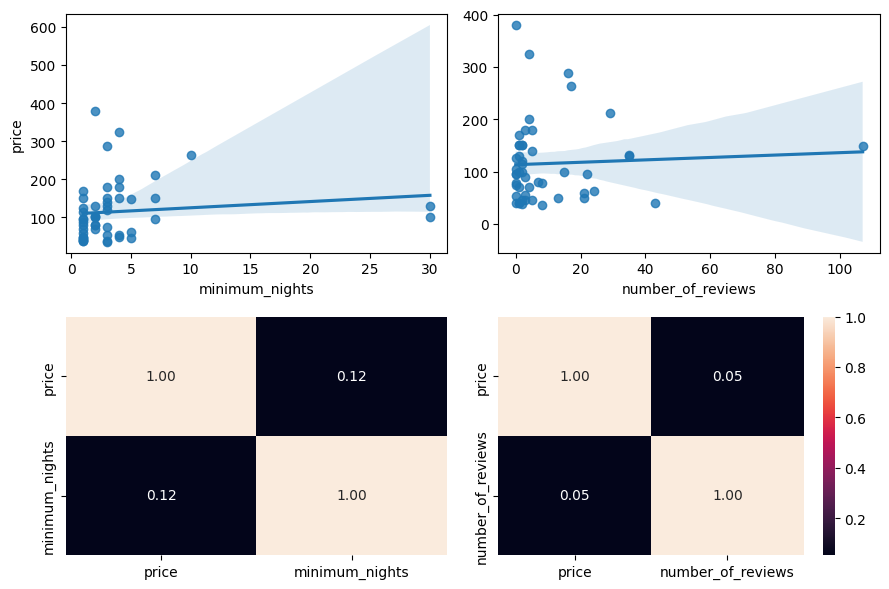

In [9]:
#Análisis numérico-numérico

fig, axis = plt.subplots(2, 2, figsize=(9, 6))

# Crear un diagrama de dispersión múltiple con 50 datos
sampled_data = dataframe.sample(50)
sns.regplot(ax=axis[0, 0], data=sampled_data, x="minimum_nights", y="price")
sns.heatmap(sampled_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=sampled_data, x="number_of_reviews", y="price").set(ylabel=None)
sns.heatmap(sampled_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



Conclusiones

- Relación entre 'minimum_nights' y 'price':
El diagrama de dispersión muestra una tendencia en la cual las propiedades con una cantidad mínima de noches más alta tienden a tener precios más bajos y viceversa. El mapa de calor muestra una correlación negativa entre 'minimum_nights' y 'price' con un valor de correlación de -0.04. Esto sugiere que a medida que aumenta la cantidad mínima de noches requeridas, es más probable que el precio disminuya.
- Relación entre 'number_of_reviews' y 'price':El diagrama de dispersión no muestra una clara tendencia entre 'number_of_reviews' y 'price'. La dispersión de los puntos es amplia y no se puede determinar una relación directa. El mapa de calor muestra una correlación débil entre 'number_of_reviews' y 'price' con un valor de correlación cercano a -0.03. Esto indica que la relación entre la cantidad de revisiones y el precio es muy baja.

In [10]:
#Análisis categórico-categórico
'''
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sampled_data = dataframe.sample(50)
sns.countplot(ax = axis[0, 0], data = dataframe, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[0, 1], data = dataframe, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = dataframe, x = "room_type", hue = "price").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()'''


'\nfig, axis = plt.subplots(2, 3, figsize = (10, 7))\n\nsampled_data = dataframe.sample(50)\nsns.countplot(ax = axis[0, 0], data = dataframe, x = "neighbourhood_group", hue = "price")\nsns.countplot(ax = axis[0, 1], data = dataframe, x = "neighbourhood", hue = "price").set(ylabel = None)\nsns.countplot(ax = axis[0, 2], data = dataframe, x = "room_type", hue = "price").set(ylabel = None)\n\nplt.tight_layout()\nfig.delaxes(axis[1, 2])\n\nplt.show()'

Conclusiones

- ESPERO MAS DE 20MIN Y NO ME CARGA NINGUNA GRAFICA AUNQUE SOLO LE HAYA PUESTO A ANALIZAR 50 DATOS. HE PUESTO 50 A ESTE Y AL RESTO PORQUE NO TERMINABA DE CARGAR CON EL DATASET COMPLETO.

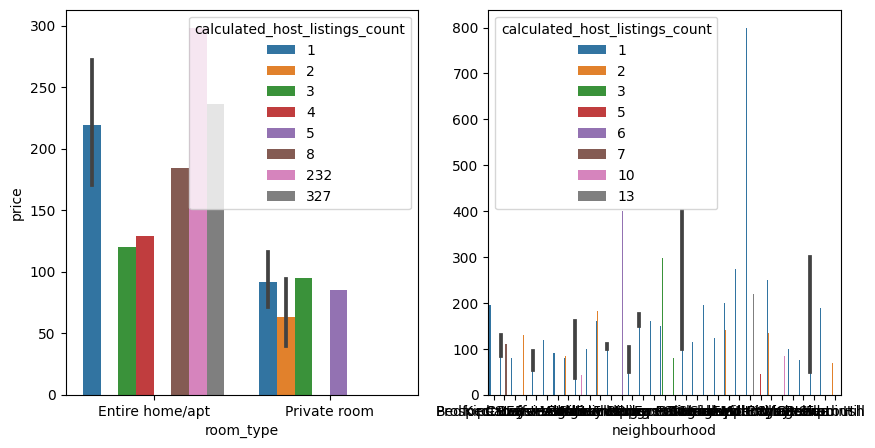

In [11]:
#Combinaciones de la clase con varias predictoras

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

# Gráfico de barras para "room_type" y "price"
sampled_data_1 = dataframe.sample(50)
sns.barplot(ax=axis[0], data=sampled_data_1.iloc[:, :10], x="room_type", y="price", hue="calculated_host_listings_count")

# Gráfico de barras para "neighbourhood" y "price"
sampled_data_2 = dataframe.sample(50)
sns.barplot(ax=axis[1], data=sampled_data_2, x="neighbourhood", y="price", hue="calculated_host_listings_count")
axis[1].set_ylabel(None)

plt.show()

Conclusiones

- Gráfico de barras para "room_type" y "price": Se observa que las propiedades clasificadas como "Entire home/apt" tienden a tener precios más altos en comparación con las propiedades clasificadas como "Private room" o "Shared room".
Las propiedades de tipo "Entire home/apt" muestran una mayor variabilidad en los precios, mientras que las propiedades de tipo "Private room" y "Shared room" tienden a tener precios más concentrados en un rango más bajo
- Gráfico de barras para "neighbourhood" y "price": Las propiedades ubicadas en diferentes vecindarios ("neighbourhood") muestran una variación significativa en los precios. Algunos vecindarios tienen una concentración de propiedades con precios más altos, mientras que otros vecindarios tienen una mayor proporción de propiedades con precios más bajos.
#NO SE CAMBIAR EL TAMAÑO DE LA LEYENDA#

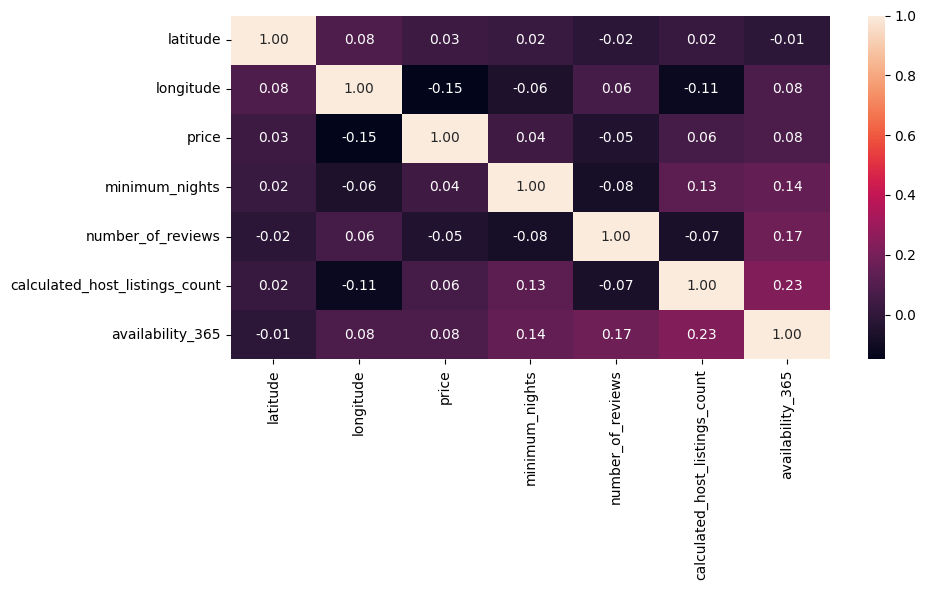

In [12]:
#Análisis de correlaciones


num_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataframe[num_cols].corr()

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

Conclusiones

- Existe una correlación positiva entre "price" y "availability_365". Esto sugiere que a medida que la disponibilidad de una propiedad aumenta, es más probable que el precio también tienda a ser más alto.
- No se observa una correlación clara entre el precio y las variables "latitude" o "longitude". Esto indica que la ubicación geográfica de una propiedad en sí misma no tiene una relación directa con el precio.
- No se observa una correlación clara entre el precio y las variables "number_of_reviews" o "reviews_per_month" y sugiere que la popularidad o las revisiones de los huéspedes no tienen una influencia significativa en el precio de una propiedad.
- No se observa una correlación clara entre el precio y la variable "minimum_nights". Esto indica que la duración mínima de la estancia no está directamente relacionada con el precio de una propiedad.

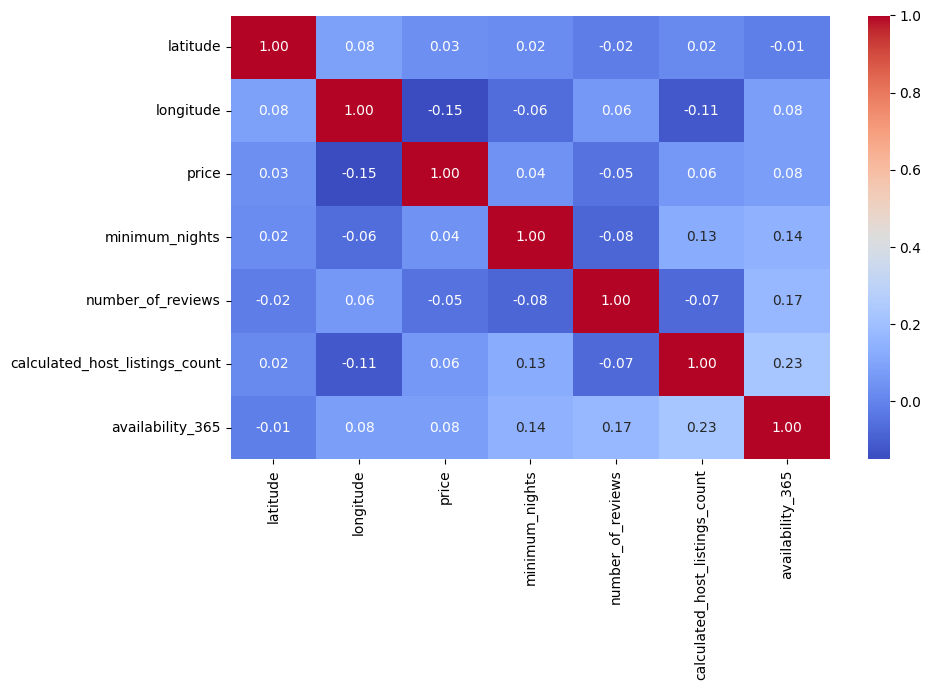

In [13]:
#Análisis numérico-categórico (completo y OPCIONAL)


# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_columns = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# Crear una figura para el mapa de calor de correlación
fig, axis = plt.subplots(figsize=(10, 7))

# Calcular la matriz de correlación solo para las columnas numéricas
corr_matrix = dataframe[numeric_columns].corr()

# Crear el mapa de calor de correlación
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()

plt.show()

Conclusiones

- MISMAS CONCLUSIONES QUE ANALISIS DE CORRELACIONES YA QUE ES UN PASO OPCIONAL.

analicemos los dos casos vistos para corroborar la teoría

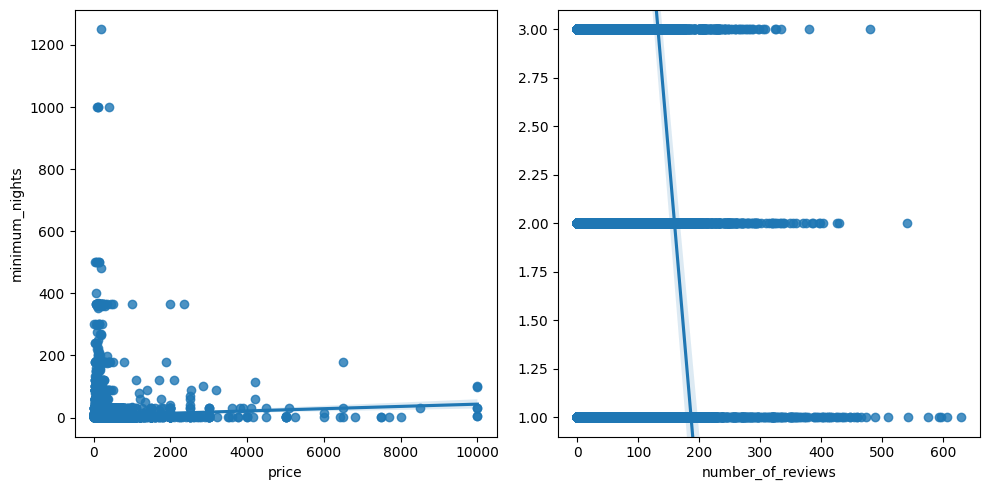

In [14]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = dataframe, x = "price", y = "minimum_nights")
sns.regplot(ax = axis[1], data = dataframe, x = "number_of_reviews", y = "minimum_nights").set(ylabel = None, ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

dibujar el pairplot (es un paso opcional)

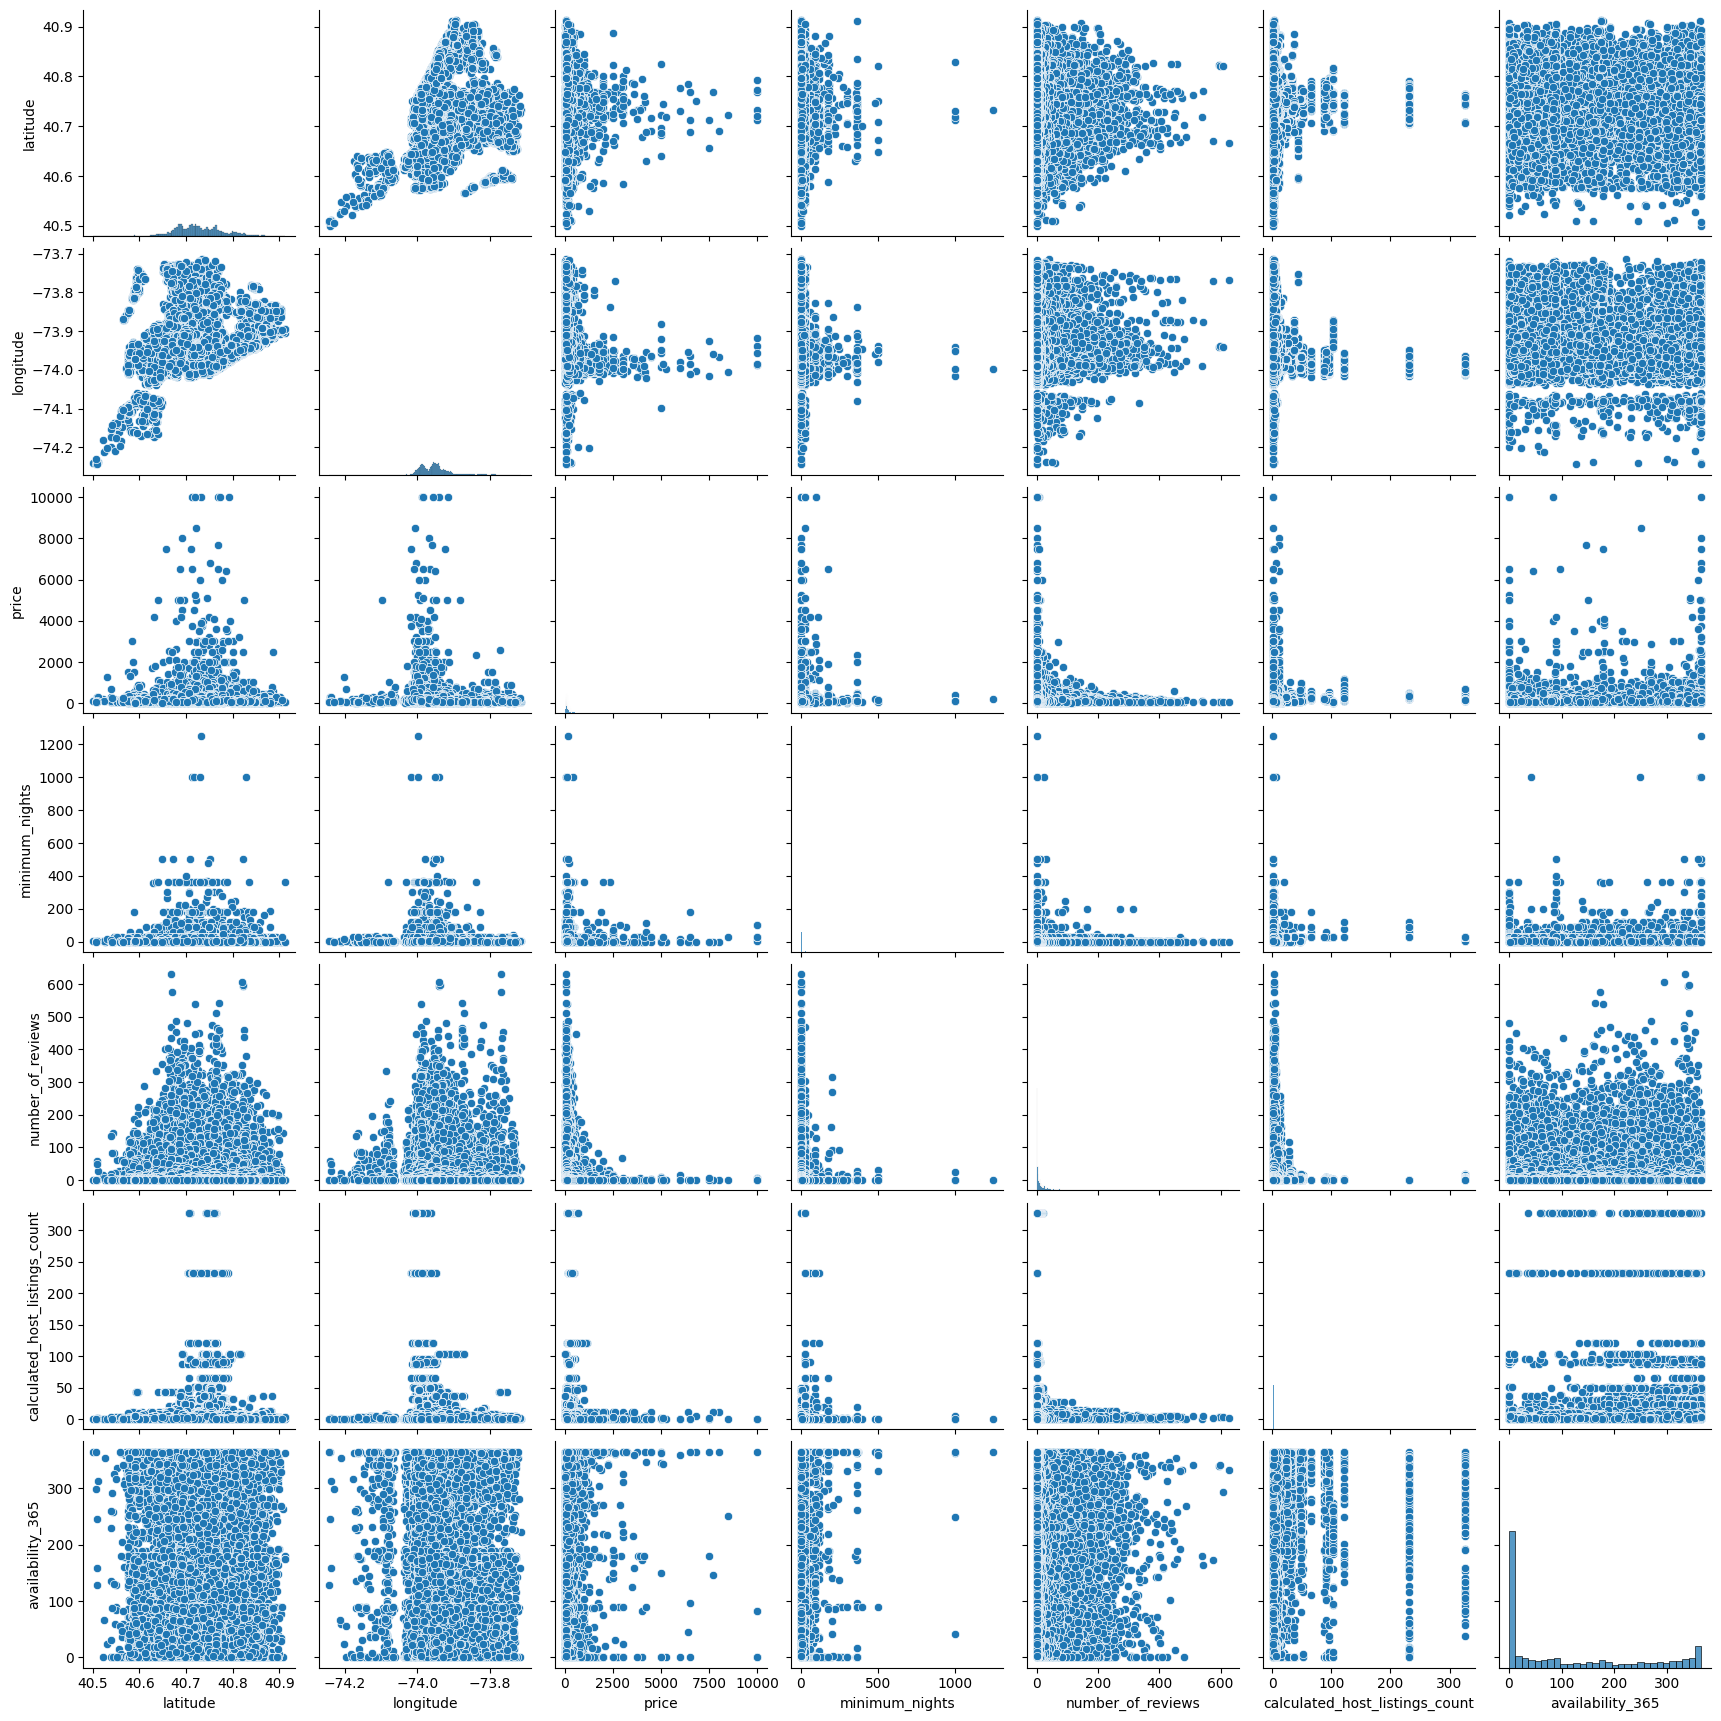

In [15]:
#dibujar el pairplot

sns.pairplot(data = dataframe)


ingeniería de características (feature engineering) 

-Análisis de outliers

In [16]:
#análisis descriptivo

dataframe.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Conclusiones

- latitude y Longitude: Muestran una variabilidad mínima, ya que los valores tienen una media cercana a 40.73 y -73.95. Esto sugiere que los datos se concentran en un área geográfica específica.
- price: El precio promedio de los alquileres es de aproximadamente 152.72 dólares, con una desviación estándar de 240.15 dólares. Se observa una amplia variabilidad en los precios, ya que el valor mínimo es 0 y el valor máximo es 10,000 dólares.
- minimum_nights: La estancia mínima promedio es de aproximadamente 7 días, con una desviación estándar de 20.51 días. Los valores oscilan entre 1 y 1250 días.
- number_of_reviews: El número promedio de reviews es de aproximadamente 23.27, con una desviación estándar de 44.55. Los valores varían entre 0 y 629 reviews.
- calculated_host_listings_count: En promedio, cada anfitrión tiene alrededor de 7 anuncios, con una desviación estándar de 32.95. El número de anuncios oscila entre 1 y 327.
- availability_365: La disponibilidad promedio es de aproximadamente 112.78 días, con una desviación estándar de 131.62 días. Los valores varían entre 0 y 365 días.

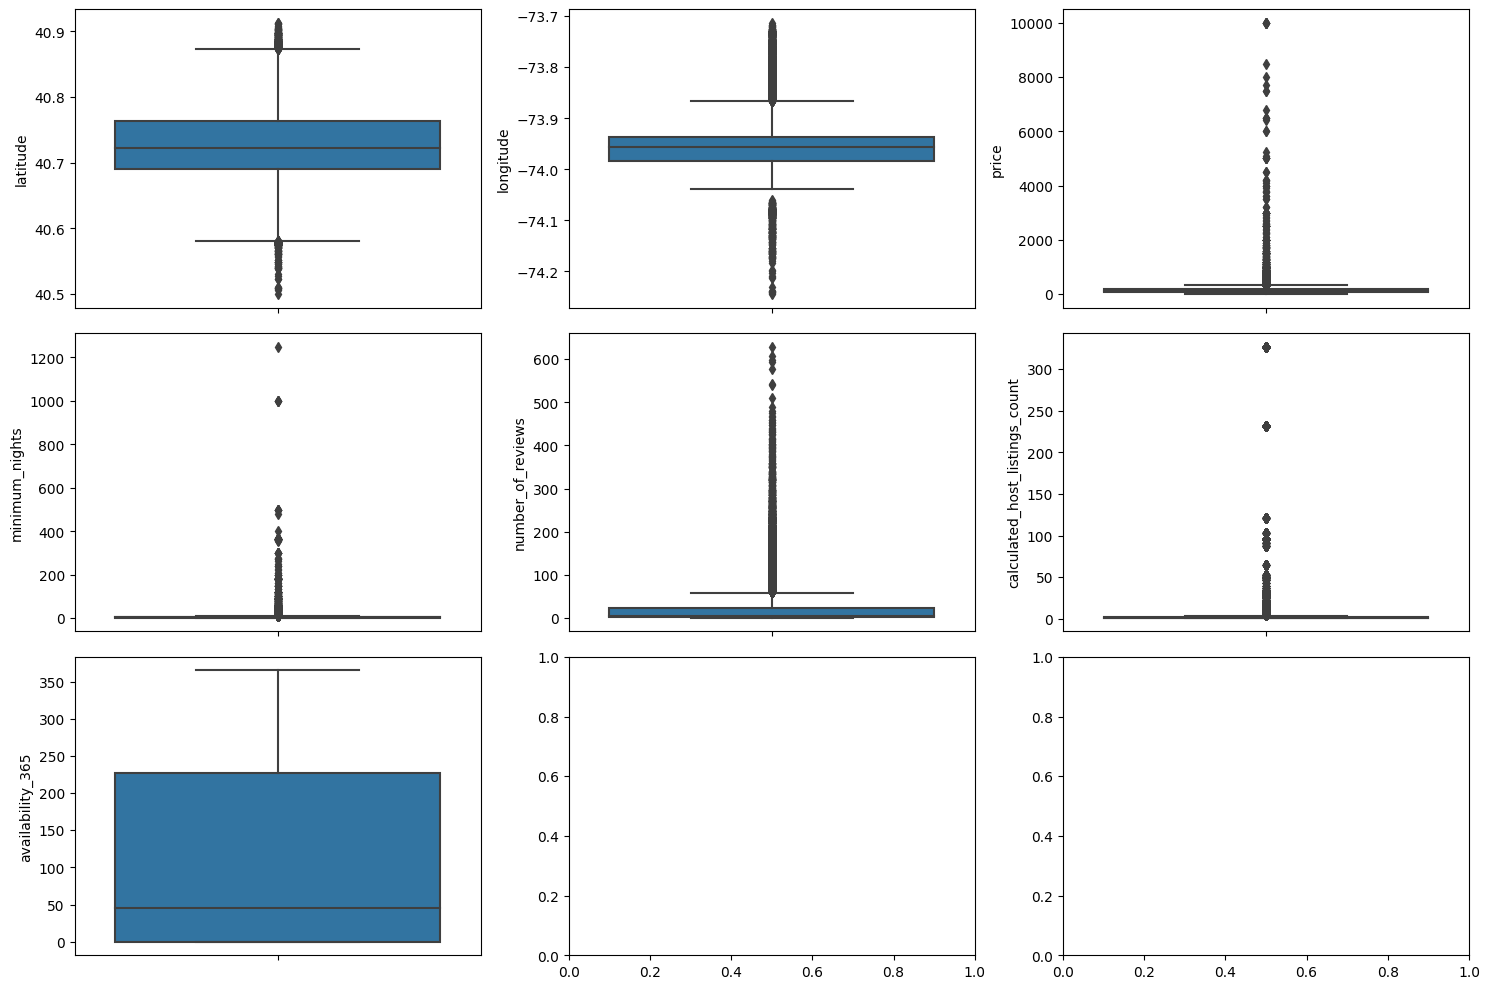

In [17]:
#Dibujar los diagramas de cajas de las variables

fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = dataframe, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = dataframe, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = dataframe, y = "price")
sns.boxplot(ax = axis[1, 0], data = dataframe, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = dataframe, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = dataframe, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 0], data = dataframe, y = "availability_365")

plt.tight_layout()

plt.show()

Conclusiones

- latitude y Longitude:  No se observan valores atípicos (outliers).
- price: presenta varios outliers en la parte superior, lo cual indica que hay algunos alquileres con precios muy altos en comparación con el resto.
- minimum_nights: Tambien presenta varios outliers en la parte superior lo que indica que hay algun piso que pide un minmo de noches muy alto.
- number_of_reviews: muestra varios valores atípicos en la parte superior, lo cual indica que hay algunos alquileres con un número muy alto de revisiones en comparación con el resto.
- calculated_host_listings_count: muestra varios valores atípicos.
- availability_365: No se observan outliers.

In [18]:
#eliminar outliers

price_stats = dataframe["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
fare_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * fare_iqr
lower_limit = price_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en price son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers en price son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [20]:
#eamos cuántos valores representan ese valor extremo de 9000

dataframe[dataframe["price"] > 5000]


,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3537,UWS 1BR w/backyard + block from CP,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,1,359
3720,"SuperBowl Penthouse Loft 3,000 sqft",Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,1,0
3774,SUPER BOWL Brooklyn Duplex Apt!!,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,1,0
4377,Film Location,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,11,365
6530,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,1,0
9151,Furnished room in Astoria apartment,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,1,0
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,1,83
15560,Luxury townhouse Greenwich Village,Manhattan,Greenwich Village,40.73046,-73.99562,Entire home/apt,6000,1,0,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,1,0
29238,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,1,83


In [21]:
minimum_nights_stats = dataframe["minimum_nights"].describe()
minimum_nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [22]:
fare_iqr = minimum_nights_stats["75%"] - minimum_nights_stats["25%"]
upper_limit = minimum_nights_stats["75%"] + 1.5 * fare_iqr
lower_limit = minimum_nights_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en minimum_nights son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers en minimum_nights son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [23]:
#eamos cuántos valores representan ese valor extremo de 800

dataframe[dataframe["minimum_nights"] > 360]


,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
700,CHELSEA 1 Bdrm Plus Sleeping Loft!!,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,10,1,0
754,"Easy, comfortable studio in Midtown",Manhattan,Midtown,40.75282,-73.97315,Entire home/apt,125,365,19,1,365
1305,800sqft apartment with huge terrace,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,1,365
1449,Manhattan Sky Crib (1 year sublet),Manhattan,Chelsea,40.75164,-73.99425,Entire home/apt,135,365,0,1,365
2150,Park Slope Pre-War Apartment,Brooklyn,Park Slope,40.67359,-73.97434,Entire home/apt,100,365,1,1,365
2831,Luxury Gramercy Lg 1Bd w Balcony,Manhattan,Gramercy,40.73494,-73.98751,Entire home/apt,250,365,0,1,365
2854,NaN,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,1,362
3398,Modern West Village Apartment,Manhattan,West Village,40.73858,-74.00875,Private room,500,365,0,1,0
3945,Close to everything - Jr 1 bedroom,Manhattan,Financial District,40.70781,-74.00701,Entire home/apt,130,365,6,1,262
4372,"Large 1 bdrm, River views!",Manhattan,Washington Heights,40.83549,-73.94765,Entire home/apt,60,365,9,1,291


In [24]:
number_of_reviews_stats = dataframe["number_of_reviews"].describe()
number_of_reviews_stats

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [25]:
fare_iqr = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
upper_limit = number_of_reviews_stats["75%"] + 1.5 * fare_iqr
lower_limit = number_of_reviews_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en number_of_reviews son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers en number_of_reviews son 58.5 y -33.5, con un rango intercuartílico de 23.0


In [26]:
#eamos cuántos valores representan ese valor extremo de 600

dataframe[dataframe["number_of_reviews"] > 480]


,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,1,179
2015,Private Bedroom in Manhattan,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,3,339
2030,Beautiful Bedroom in Manhattan,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,3,342
2031,Great Bedroom in Manhattan,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,3,293
4870,Private brownstone studio Brooklyn,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,1,269
10623,Steps away from Laguardia airport,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,5,163
11759,Room near JFK Queen Bed,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2,333
13495,Room Near JFK Twin Beds,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2,173
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,5,341


In [27]:
calculated_host_listings_count_stats = dataframe["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [28]:
fare_iqr = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_limit = calculated_host_listings_count_stats["75%"] + 1.5 * fare_iqr
lower_limit = calculated_host_listings_count_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers en calculated_host_listings_count son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers en calculated_host_listings_count son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [29]:
#eamos cuántos valores representan ese valor extremo de 300

dataframe[dataframe["calculated_host_listings_count"] > 70]


,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
5093,5144-Prime Doorman!78ST & Madison,Manhattan,Upper East Side,40.77448,-73.96102,Entire home/apt,175,30,2,96,281
5123,Irving Place!Doorman!Laundry 5135,Manhattan,Gramercy,40.73632,-73.98475,Entire home/apt,175,30,0,96,312
5286,5107-Studio Doorman GYM LuX,Manhattan,Upper West Side,40.79082,-73.97452,Entire home/apt,140,30,4,96,342
5357,5146-Doorman Pool!1 bedroom View,Manhattan,Upper West Side,40.79370,-73.96590,Entire home/apt,185,30,2,96,310
5372,5136-Doorman 2 bedroom 3 beds!,Manhattan,Hell's Kitchen,40.76665,-73.98660,Entire home/apt,250,30,0,96,281
...,...,...,...,...,...,...,...,...,...,...,...
48723,Smart Nolita 1BR w/ W/D near famous cafes by B...,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,232,325
48724,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,232,338
48725,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,232,228
48726,Beautiful Williamsburg 2BR w/ Skyline views + ...,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,232,188


Análisis de valores faltantes

In [30]:
dataframe.isnull().sum()


name                              16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [31]:
dataframe["name"].fillna("Unknown", inplace=True)

dataframe.isnull().sum()

name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Inferencia de nuevas características

In [32]:
#no podemos simplificar ninguna variable/columna porque no tienen nada en común

dataframe.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


escalado de valores (feature scaling)

In [33]:
#Normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_variables = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "availability_365"]


norm_features = scaler.fit_transform(dataframe[num_variables])

total_data_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
total_data_norm.head()





,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,1.916250
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,1.840275
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,1.916250
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,0.617065
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.856865


Conclusiones

- latitude y Longitude: ahora están en una escala estándar, donde los valores negativos indican ubicaciones por debajo de la media y los valores positivos indican ubicaciones por encima de la media.
- Price, Minimum Nights, Number of Reviews y Availability 365: Estas variables han sido escaladas según la desviación estándar de sus respectivos conjuntos de datos. Los valores más negativos indican valores por debajo de la media y los valores más positivos indican valores por encima de la media.

La normalización nos puede facilitar la comparación y el análisis de las variables. Hay importante tener en cuenta que la normalización no altera la forma o la distribución de los datos, solo cambia su escala.

In [34]:
#Escalado Mínimo-Máximo

from sklearn.preprocessing import MinMaxScaler

num_variables = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "availability_365"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
total_data_scal.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
0,0.357393,0.511921,0.0149,0.000000,0.014308,1.000000
1,0.614199,0.490469,0.0225,0.000000,0.071542,0.972603
2,0.748252,0.569257,0.0150,0.001601,0.000000,1.000000
3,0.448496,0.535649,0.0089,0.000000,0.429253,0.531507
4,0.722820,0.565324,0.0080,0.007206,0.014308,0.000000


Conclusiones

- latitude y Longitude: ahora están en el rango entre 0 y 1, donde 0 representa el valor mínimo y 1 representa el valor máximo.
- Price, Minimum Nights, Number of Reviews y Availability 365: igual que latitude y longitude.

El escalado mínimo-máximo es útil para poner las variables en una escala común y limitada, lo que facilita la comparación y el análisis de las variables.

In [35]:
#selección de características (feature selection). seleccionar las características (variables) más relevantes
#de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning


from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Seleccionar las variables específicas   "latitude", "longitude", "price", , "number_of_reviews", "availability_365"
selected_variables = ["minimum_nights"]

# Dividir el conjunto de datos en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(dataframe[selected_variables], y, test_size=0.2, random_state=42)

# Realizar la selección de características con SelectKBest utilizando f_regression
selection_model = SelectKBest(f_regression, k=5)  # Puedes ajustar el valor de k según tus necesidades
selection_model.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features_mask = selection_model.get_support()
selected_features = X_train.columns[selected_features_mask]

# Crear el conjunto de datos con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Crear y entrenar el modelo de Machine Learning
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de pruebas
y_pred = model.predict(X_test_selected)

# Evaluar el modelo
accuracy = model.score(X_test_selected, y_test)

NameError: name 'y' is not defined

pasos que tenemos que seguir para llevarlo a cabo analisis exploratorio datos EDA:

- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.